## Usage of functions in lstd.py

In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
import numpy as np
import matplotlib.pyplot as plt

import lstd
import test_utils

In [144]:
p = 5
q = 3
Q, R = np.eye(p), np.eye(q)

In [145]:
A, B = test_utils.random_env(p, q, Anorm=1.05)
ctrl = test_utils.random_controller(q)

In [146]:
num_trajs = 100
T = 50
xtrajs, utrajs, rtrajs = [], [], []
for _ in range(num_trajs):
    xtraj, utraj, rtraj = test_utils.sample_traj(A, B, Q, R, ctrl, T)
    xtrajs.append(xtraj)
    utrajs.append(utraj)
    rtrajs.append(rtraj)
traj = lstd.construct_traj_list(xtrajs, utrajs, rtrajs)

In [147]:
K0 = np.random.random((q, p))
K, P = lstd.lspi(traj, 0.99)

In [150]:
K,P = K

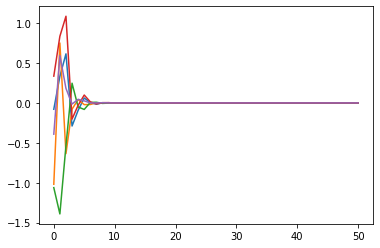

In [163]:
ctrl = test_utils.linear_feedback_controller(K)
xtraj, utraj, rtraj = test_utils.sample_traj(A, B, Q, R, ctrl, T)
_ = plt.plot(np.arange(T+1), xtraj)